In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gc
import seaborn as sns
%matplotlib inline

p = sns.color_palette()

In [3]:
print "# All file and their sizes:"
print
for f in os.listdir('../Outbrain'):
    if ".csv" in f:
        print f.ljust(30) + str(round(os.path.getsize('../Outbrain/' + f) / 1e6, 2)) + 'MB'

# All file and their sizes:

clicks_test.csv               506.95MB
clicks_train.csv              1486.73MB
documents_categories.csv      118.02MB
documents_entities.csv        324.1MB
documents_meta.csv            89.38MB
documents_topics.csv          339.47MB
events.csv                    1208.55MB
page_views_sample.csv         454.35MB
promoted_content.csv          13.89MB
sample_submission.csv         273.14MB
sub1.csv                      273.14MB


We are missing the "```page_views.csv```" file, because it is over 100GB unzipped. So, we just look into the page_views_sample.csv instead on developing our analysis.

In [4]:
clicks_test = pd.read_csv('clicks_test.csv')
clicks_train = pd.read_csv('clicks_train.csv')

In [6]:
print "Variable names: "
print 
print "clicks_test".ljust(30), clicks_test.columns.values
print "clicks_train".ljust(30), clicks_train.columns.values

 Variable names: 

clicks_test                    ['display_id' 'ad_id']
clicks_train                   ['display_id' 'ad_id' 'clicked']


In [7]:
clicks_train

,display_id,ad_id,clicked
0,1,42337,0
1,1,139684,0
2,1,144739,1
3,1,156824,0
4,1,279295,0
5,1,296965,0
6,2,125211,0
7,2,156535,0
8,2,169564,0
9,2,308455,1


## The distribution of the number of ads in a display:

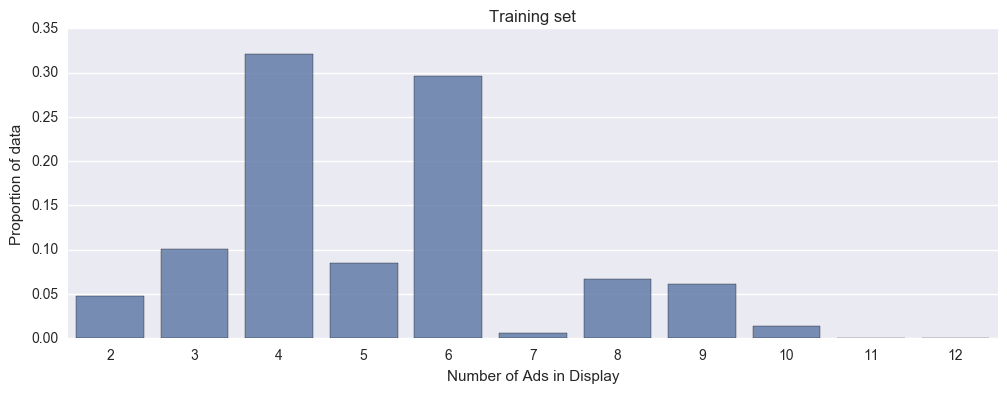

In [30]:
num_ads = clicks_train.groupby("display_id")["ad_id"].count().value_counts()
num_ads = num_ads / np.sum(num_ads)
plt.figure(figsize=(12,4))
sns.barplot(num_ads.index, num_ads.values, alpha=0.8, color=p[0])
plt.xlabel("Number of Ads in Display")
plt.ylabel("Proportion of data")
plt.title("Training set")

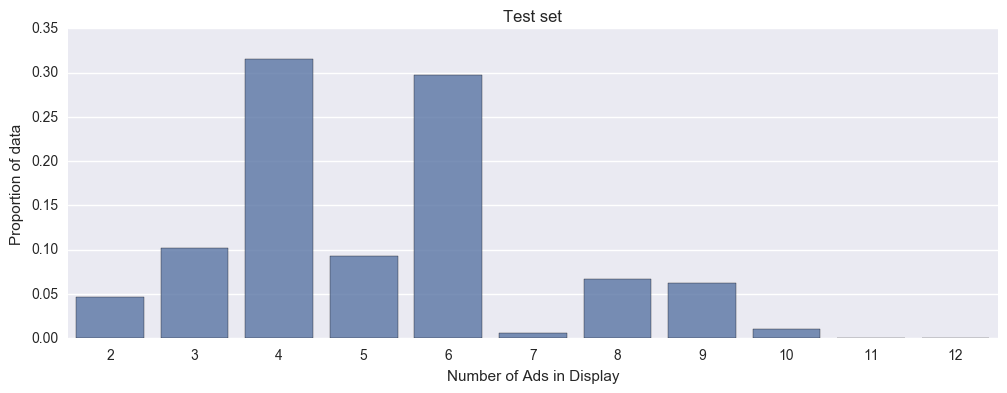

In [31]:
num_ads = clicks_test.groupby("display_id")["ad_id"].count().value_counts()
num_ads = num_ads / np.sum(num_ads)
plt.figure(figsize=(12,4))
sns.barplot(num_ads.index, num_ads.values, alpha=0.8, color=p[0])
plt.xlabel("Number of Ads in Display")
plt.ylabel("Proportion of data")
plt.title("Test set")

We can say that the distributions of the number of ads in display are the same for both training set and test set. The most frequency is 4 or 6 ads, the maximum are both 12. That is the reason why the evaluation uses $MAP@12$.

## Number of appearance, number of clicks and click rates for ads

In [42]:
num_appr = clicks_train.groupby("ad_id")["ad_id"].count()
num_click = clicks_train.groupby("ad_id")["clicked"].sum()
click_rate = (num_click + 0.0)/num_appr

mean: 181.943273828
max: 211824
min: 1
median: 5.0
std 1910.68757307
Ads that had appeared less than 2 times: 22.69%
Ads that had appeared less than 10 times: 61.74%
Ads that had appeared less than 50 times: 86.93%
Ads that had appeared less than 100 times: 91.04%
Ads that had appeared less than 1000 times: 97.45%


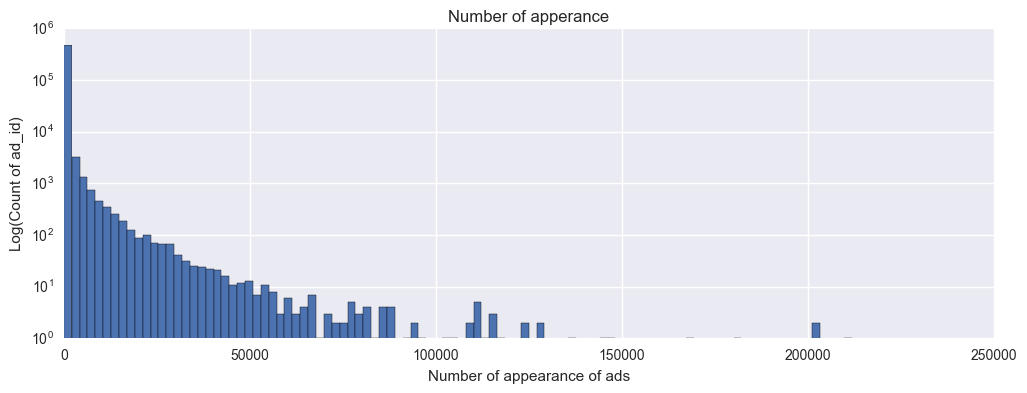

In [74]:
plt.figure(figsize=(12,4))
plt.hist(num_appr, bins = 100, log = True)
plt.xlabel("Number of appearance of ads")
plt.ylabel("Log(Count of ad_id)")
plt.title("Number of apperance")
print "mean:", num_appr.mean()
print "max:", num_appr.max()
print "min:", num_appr.min()
print "median:", np.median(num_appr)
print "std", np.std(num_appr)
for i in [2, 10, 50, 100, 1000]:
    print('Ads that had appeared less than {} times: {}%'.format(i, round((num_appr < i).mean() * 100, 2)))

mean: 35.2324731183
max: 44824
min: 0
median: 1.0
std 422.647158861
Ads that had been clicked less than 1 times: 46.94%
Ads that had been clicked less than 2 times: 65.57%
Ads that had been clicked less than 3 times: 73.85%
Ads that had been clicked less than 10 times: 88.7%
Ads that had been clicked less than 100 times: 96.59%
Ads that had been clicked less than 1000 times: 99.31%


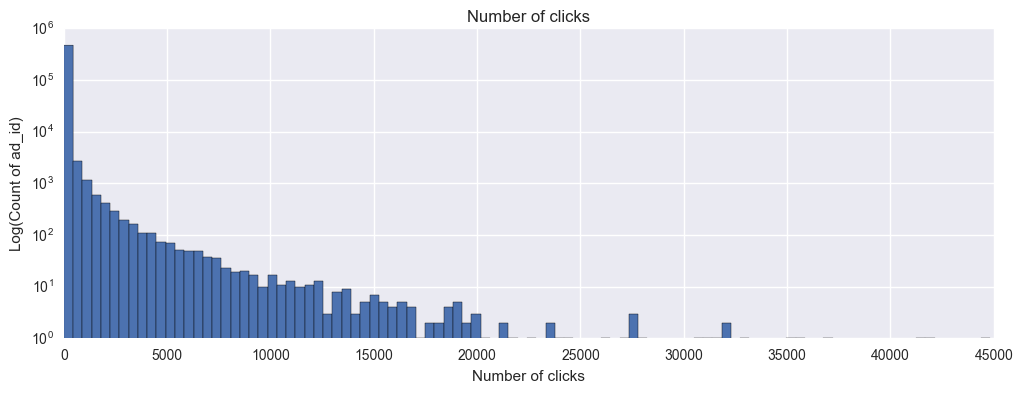

In [77]:
plt.figure(figsize=(12,4))
plt.hist(num_click, bins = 100, log = True)
plt.xlabel("Number of clicks")
plt.ylabel("Log(Count of ad_id)")
plt.title("Number of clicks")
print "mean:", num_click.mean()
print "max:", num_click.max()
print "min:", num_click.min()
print "median:", np.median(num_click)
print "std", np.std(num_click)
for i in [1, 2, 3, 10, 100, 1000]:
    print('Ads that had been clicked less than {} times: {}%'.format(i, round((num_click < i).mean() * 100, 2)))

mean: 0.143224101154
max: 1.0
min: 0.0
median: 0.051724137931
std 0.217684217385
Ads that had click rate less than 0.0001: 46.94%
Ads that had click rate less than 0.01: 47.0%
Ads that had click rate less than 0.1: 57.23%
Ads that had click rate less than 0.2: 72.61%
Ads that had click rate less than 0.5: 91.9%
Ads that had click rate less than 0.99999: 96.73%


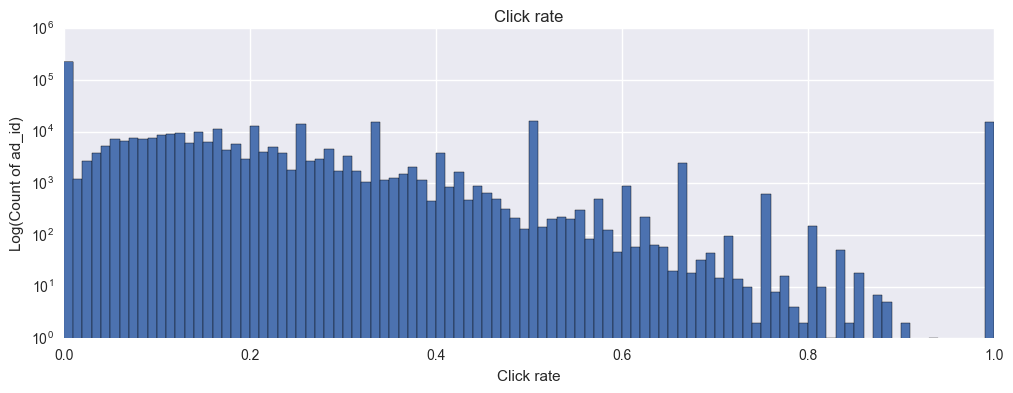

In [104]:
plt.figure(figsize=(12,4))
plt.hist(click_rate, bins = 100, log = True)
plt.xlabel("Click rate")
plt.ylabel("Log(Count of ad_id)")
plt.title("Click rate")
print "mean:", click_rate.mean()
print "max:", click_rate.max()
print "min:", click_rate.min()
print "median:", np.median(click_rate)
print "std", np.std(click_rate)
for i in [0.0001, 0.01, 0.1, 0.2, 0.5, 0.99999]:
    print('Ads that had click rate less than {}: {}%'.format(i, round((click_rate < i).mean() * 100, 2)))

There are about 46.94% of the ads that had never been clicked, and about 3.27% has click rate 1, which probably had only appeared once or twice. Regularization is needed.

## Promoted Content

In [294]:
promoted_content = pd.read_csv('promoted_content.csv')

In [72]:
a = set(clicks_train["ad_id"])
b = set(clicks_test["ad_id"])
c = set(promoted_content["ad_id"])
print "Is ad_id in clicks_train a subset of ad_id in promoted_content? ", a.issubset(c)
print "Is ad_id in clicks_test a subset of ad_id in promoted_content? ", b.issubset(c)
print "Is ad_id in clicks_test a subset of ad_id in clicks_train? ", b.issubset(a)

Is ad_id in clicks_train a subset of ad_id in promoted_content?  True
Is ad_id in clicks_test a subset of ad_id in promoted_content?  True
Is ad_id in clicks_test a subset of ad_id in clicks_train?  False


In [296]:
promoted_content["num_appr"] = num_appr
promoted_content["num_click"] = num_click
promoted_content["click_rate"] = click_rate

In [298]:
promoted_content = promoted_content.fillna(0)

In [292]:
# promoted_content["num_appr"] = promoted_content["num_appr"] + 100
# promoted_content["num_click"] = promoted_content["num_click"] + 2
# promoted_content["click_rate"] = (promoted_content["num_click"] + 0.0) / promoted_content["num_appr"]

In [300]:
promoted_content.set_index(promoted_content["ad_id"], inplace = True)
promoted_content[0:20]

,ad_id,document_id,campaign_id,advertiser_id,num_appr,num_click,click_rate
ad_id,,,,,,,
1,1,6614,1,7,0.0,0.0,0.000000
2,2,471467,2,7,2.0,0.0,0.000000
3,3,7692,3,7,22.0,1.0,0.045455
4,4,471471,2,7,161.0,11.0,0.068323
5,5,471472,2,7,32.0,4.0,0.125000
6,6,12736,1,7,1.0,0.0,0.000000
7,7,12808,1,7,1.0,0.0,0.000000
8,8,471477,2,7,3406.0,985.0,0.289196
9,9,13379,1,7,28.0,4.0,0.142857


In [302]:
campaign_ctr = (promoted_content.groupby("campaign_id")["num_click"].sum() + 0.0)/ promoted_content.groupby("campaign_id")["num_appr"].sum()

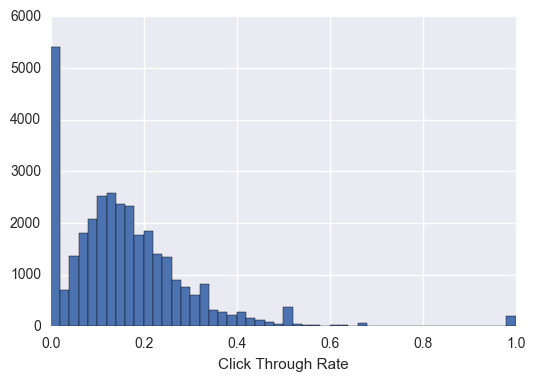

In [310]:
plt.hist(campaign_ctr[~np.isnan(campaign_ctr)],bins = 50)
plt.xlabel("Click Through Rate")

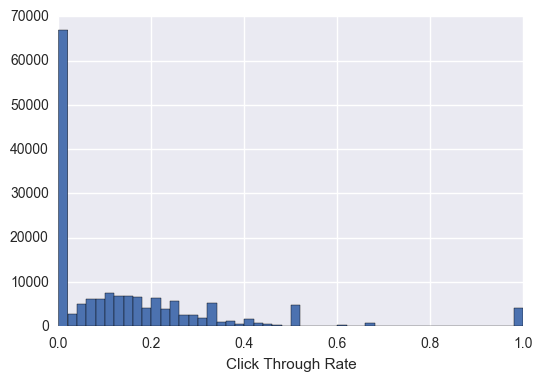

In [312]:
document_ctr = (promoted_content.groupby("document_id")["num_click"].sum() + 0.0)/ promoted_content.groupby("document_id")["num_appr"].sum()
plt.hist(document_ctr[~np.isnan(document_ctr)],bins = 50)
plt.xlabel("Click Through Rate")

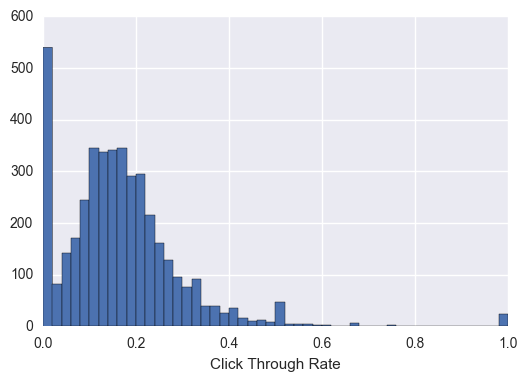

In [314]:
advertiser_ctr = (promoted_content.groupby("advertiser_id")["num_click"].sum() + 0.0)/ promoted_content.groupby("advertiser_id")["num_appr"].sum()
plt.hist(advertiser_ctr[~np.isnan(advertiser_ctr)],bins = 50)
plt.xlabel("Click Through Rate")

In [278]:
print "Is every ad_id corresponds to only one document_id?"
a = promoted_content.groupby("ad_id")["document_id"].count()
print "The answer is: ", sum(a) == len(a)

Is every ad_id corresponds to only one document_id?
The answer is:  True


Is every document_id corresponds to only one ad_id?
The answer is:  False


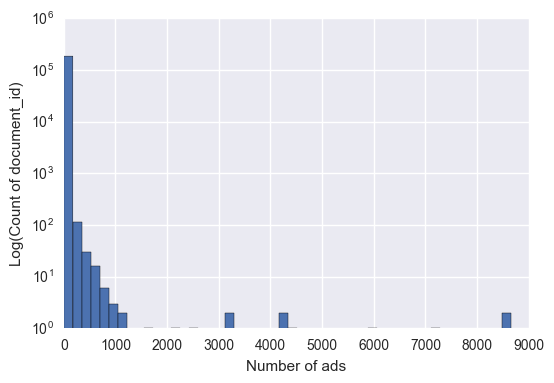

In [283]:
print "Is every document_id corresponds to only one ad_id?"
a = promoted_content.groupby("document_id")["ad_id"].count()
print "The answer is: ", sum(a) == len(a)
plt.hist(a,bins = 50, log = True)
plt.xlabel("Number of ads")
plt.ylabel("Log(Count of document_id)")

In [286]:
print "Is every ad_id corresponds to only one campaign_id?"
a = promoted_content.groupby("ad_id")["campaign_id"].count()
print "The answer is: ", sum(a) == len(a)

Is every ad_id corresponds to only one campaign_id?
The answer is:  True


Is every campaign_id corresponds to only one ad_id?
The answer is:  False


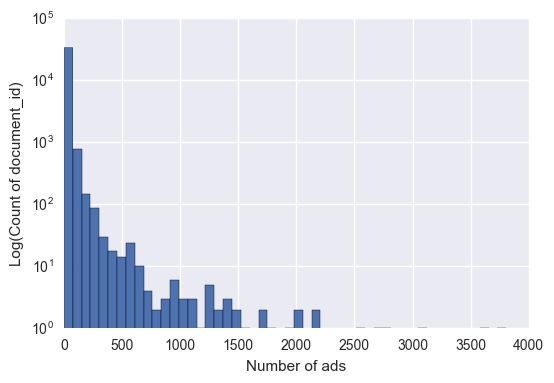

In [288]:
print "Is every campaign_id corresponds to only one ad_id?"
a = promoted_content.groupby("campaign_id")["ad_id"].count()
print "The answer is: ", sum(a) == len(a)
plt.hist(a,bins = 50, log = True)
plt.xlabel("Number of ads")
plt.ylabel("Log(Count of document_id)")

## Events

In [9]:
events = pd.read_csv("events.csv")

/Users/jieli/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
events

AttributeError: 'DataFrame' object has no attribute 'topics'

In [1]:
clicks_train[1:100]

NameError: name 'clicks_train' is not defined

In [356]:
promoted_content[promoted_content["ad_id"] == 144739]

,ad_id,document_id,campaign_id,advertiser_id,num_appr,num_click,click_rate
ad_id,,,,,,,
144739,144739,1337362,18488,2909,1.0,0.0,0.0


In [12]:
documents_topics = pd.read_csv("documents_topics.csv")

In [18]:
len(documents_topics["document_id"].unique())

2495423

In [357]:
documents_topics[documents_topics["document_id"] == 1337362]

,document_id,topic_id,confidence_level
10960736,1337362,131,0.272269
10960737,1337362,198,0.212531


In [359]:
len(promoted_content)

559583

In [8]:
events.head()

NameError: name 'events' is not defined

In [202]:
def get_prob(k):
    return cc[k]

In [206]:
p = clicks_test.groupby('display_id').ad_id.apply(list)

In [207]:
ss = 1
for x in p.index:
    p[x] = sorted(p[x], key=get_prob, reverse=True)
    p[x] = " ".join([str(i) for i in p[x]])
    ss += 1
    if ss%10000 == 0:
        print (ss + 0.0)/len(p)

subm = pd.DataFrame(p.index)
subm["ad_id"] = p.values

0.0016011443699
0.00320228873981
0.00480343310971
0.00640457747962
0.00800572184952
0.00960686621942
0.0112080105893
0.0128091549592
0.0144102993291
0.016011443699
0.0176125880689
0.0192137324388
0.0208148768088
0.0224160211787
0.0240171655486
0.0256183099185
0.0272194542884
0.0288205986583
0.0304217430282
0.0320228873981
0.033624031768
0.0352251761379
0.0368263205078
0.0384274648777
0.0400286092476
0.0416297536175
0.0432308979874
0.0448320423573
0.0464331867272
0.0480343310971
0.049635475467
0.0512366198369
0.0528377642068
0.0544389085767
0.0560400529466
0.0576411973165
0.0592423416865
0.0608434860564
0.0624446304263
0.0640457747962
0.0656469191661
0.067248063536
0.0688492079059
0.0704503522758
0.0720514966457
0.0736526410156
0.0752537853855
0.0768549297554
0.0784560741253
0.0800572184952
0.0816583628651
0.083259507235
0.0848606516049
0.0864617959748
0.0880629403447
0.0896640847146
0.0912652290845
0.0928663734544
0.0944675178243
0.0960686621942
0.0976698065641
0.0992709509341
0.100872